In [1]:
from __future__ import print_function

import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import regularizers

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from tensorflow.keras import backend as K
assert len(keras.backend.tensorflow_backend._get_available_gpus()) > 0

# Train the ANNs

In [4]:
costs = pd.read_csv("~/code/fifteen-puzzle/data/datasets/15-costs-v1.csv", nrows=6000000)
costs.shape

(6000000, 17)

In [5]:
costs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,cost
0,13,4,7,15,8,0,2,1,9,6,10,14,3,12,5,11,56
1,10,2,4,12,3,13,8,0,1,5,6,7,14,9,11,15,34
2,8,15,11,14,13,5,6,7,4,9,12,0,1,2,10,3,59
3,1,0,10,6,2,3,14,8,9,7,4,13,5,11,12,15,43
4,1,5,6,8,3,4,9,14,11,10,2,12,13,15,0,7,41


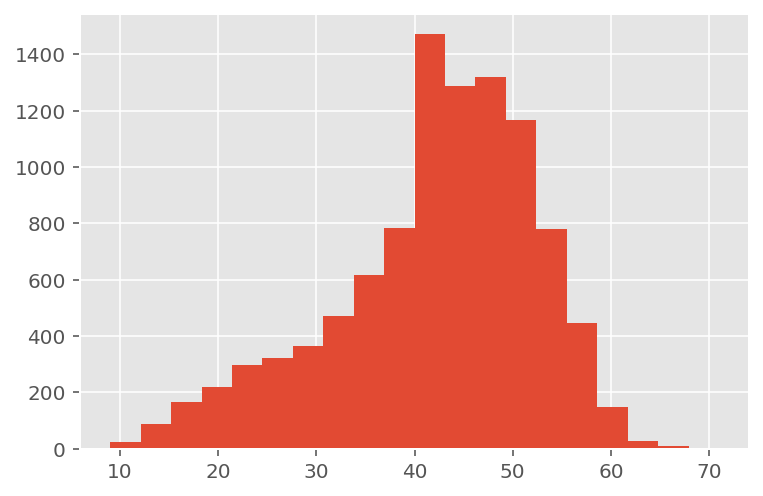

In [10]:
costs.sample(10000).cost.hist(bins=20);

In [11]:
X_raw = costs.iloc[:,:-1].values
y = costs['cost'].values

In [12]:
X = np.apply_along_axis(lambda x: np.eye(16)[x].ravel(), 1, X_raw)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42) 

In [14]:
del X, y

In [15]:
def get_model(layer_sizes, 
              learning_rate=0.001, 
              dropout_ratio=0.2, 
              activation='elu', 
              loss='mean_squared_error',
              kernel_initializer='he_normal', 
              batch_normalize=True,
              kernel_regularizer=None):
    model = Sequential()
    model.add(Dense(layer_sizes[0], 
                    input_shape=(256,), 
                    activation=activation, 
                    kernel_initializer=kernel_initializer,
                    kernel_regularizer=kernel_regularizer))
    model.add(Activation(activation))
    if batch_normalize:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_ratio))
    
    for layer_size in layer_sizes[1:]:
        model.add(Dense(layer_size, 
                        activation=activation, 
                        kernel_initializer=kernel_initializer,
                        kernel_regularizer=kernel_regularizer))
        model.add(Activation(activation))
        if batch_normalize:
            model.add(BatchNormalization())
        model.add(Dropout(dropout_ratio))

    model.add(Dense(1, kernel_initializer='he_normal', kernel_regularizer=kernel_regularizer))
    model.compile(loss=loss,
                  optimizer=Adam(lr=learning_rate))
    return model

## MSE

In [16]:
model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 4800000 samples, validate on 1200000 samples
Epoch 1/2
4800000/4800000 [==============================] - 166s 35us/sample - loss: 13.5096 - val_loss: 3.0422
Epoch 2/2
4800000/4800000 [==============================] - 162s 34us/sample - loss: 5.2108 - val_loss: 16.3522


In [17]:
model.save('keras-1024-1024-512-128-64-mse2.h5')

In [18]:
model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/2
4800000/4800000 [==============================] - 163s 34us/sample - loss: 13.5438 - val_loss: 3.1469
Epoch 2/2
4800000/4800000 [==============================] - 163s 34us/sample - loss: 5.2019 - val_loss: 2.7771


In [19]:
model.save('keras-1024-1024-512-128-64-mse3.h5')

In [20]:
model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/2
4800000/4800000 [==============================] - 167s 35us/sample - loss: 13.4930 - val_loss: 3.1081
Epoch 2/2
4800000/4800000 [==============================] - 165s 34us/sample - loss: 5.1954 - val_loss: 2.7729


In [21]:
model.save('keras-1024-1024-512-128-64-mse4.h5')

In [22]:
model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/2
4800000/4800000 [==============================] - 166s 35us/sample - loss: 13.4719 - val_loss: 3.1229
Epoch 2/2
4800000/4800000 [==============================] - 165s 34us/sample - loss: 5.1782 - val_loss: 36.1946


In [23]:
model.save('keras-1024-1024-512-128-64-mse5.h5')

In [24]:
model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/2
4800000/4800000 [==============================] - 168s 35us/sample - loss: 13.4542 - val_loss: 3.2054
Epoch 2/2
4800000/4800000 [==============================] - 167s 35us/sample - loss: 5.1747 - val_loss: 3.1454


In [25]:
model.save('keras-1024-1024-512-128-64-mse6.h5')

In [26]:
model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/2
4800000/4800000 [==============================] - 168s 35us/sample - loss: 13.4650 - val_loss: 3.1664
Epoch 2/2
4800000/4800000 [==============================] - 165s 34us/sample - loss: 5.1900 - val_loss: 2.7481


In [27]:
model.save('keras-1024-1024-512-128-64-mse7.h5')

In [28]:
model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/2
4800000/4800000 [==============================] - 173s 36us/sample - loss: 13.5229 - val_loss: 3.1129
Epoch 2/2
4800000/4800000 [==============================] - 169s 35us/sample - loss: 5.2329 - val_loss: 2.8872


In [29]:
model.save('keras-1024-1024-512-128-64-mse8.h5')

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, verbose=0, restore_best_weights=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/10
4800000/4800000 [==============================] - 204s 42us/sample - loss: 13.5588 - val_loss: 3.2653
Epoch 2/10
4800000/4800000 [==============================] - 201s 42us/sample - loss: 5.2011 - val_loss: 3.0089
Epoch 3/10
4800000/4800000 [==============================] - 209s 44us/sample - loss: 4.2395 - val_loss: 25.2879
Epoch 4/10
4800000/4800000 [==============================] - 205s 43us/sample - loss: 3.9596 - val_loss: 63.5446


## AMSE, alpha=0.2

In [35]:
def asymmetric_mean_squared_error_02(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true) * K.square(K.sign(y_pred - y_true) + 0.2), axis=-1)

In [54]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, verbose=0, restore_best_weights=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_02)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/10
4800000/4800000 [==============================] - 301s 63us/sample - loss: 11.2643 - val_loss: 3.9016
Epoch 2/10
4800000/4800000 [==============================] - 292s 61us/sample - loss: 4.9288 - val_loss: 2.9901
Epoch 3/10
4800000/4800000 [==============================] - 264s 55us/sample - loss: 4.0814 - val_loss: 2.4419
Epoch 4/10
4800000/4800000 [==============================] - 212s 44us/sample - loss: 3.8272 - val_loss: 2.7035
Epoch 5/10
4800000/4800000 [==============================] - 208s 43us/sample - loss: 3.7056 - val_loss: 2.4253
Epoch 6/10
4800000/4800000 [==============================] - 208s 43us/sample - loss: 3.6298 - val_loss: 2.2867
Epoch 7/10
4800000/4800000 [==============================] - 208s 43us/sample - loss: 3.5716 - val_loss: 2.2754
Epoch 8/10
4800000/4800000 [==============================] - 209s 44us/sample - loss: 3.5329 - val_loss: 2.2488
Epoch 9/10
4800000/4800000 [=============

In [55]:
model.save('keras-1024-1024-512-128-64-amse02.h5')

## AMSE, alpha=0.4

In [45]:
def asymmetric_mean_squared_error_04(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true) * K.square(K.sign(y_pred - y_true) + 0.4), axis=-1)

In [47]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, verbose=0, restore_best_weights=True)

model = get_model([1024, 1024, 512, 128, 64], 
                  learning_rate=0.01, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_04)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/10
4800000/4800000 [==============================] - 202s 42us/sample - loss: 8.4915 - val_loss: 3.3764
Epoch 2/10
4800000/4800000 [==============================] - 195s 41us/sample - loss: 4.1158 - val_loss: 2.6420
Epoch 3/10
4800000/4800000 [==============================] - 195s 41us/sample - loss: 3.4738 - val_loss: 2.1388
Epoch 4/10
4800000/4800000 [==============================] - 195s 41us/sample - loss: 3.2680 - val_loss: 2.3630
Epoch 5/10
4800000/4800000 [==============================] - 195s 41us/sample - loss: 3.1494 - val_loss: 2.0460
Epoch 6/10
4800000/4800000 [==============================] - 195s 41us/sample - loss: 3.0715 - val_loss: 2.0223
Epoch 7/10
4800000/4800000 [==============================] - 195s 41us/sample - loss: 3.0036 - val_loss: 1.8550
Epoch 8/10
4800000/4800000 [==============================] - 195s 41us/sample - loss: 2.9649 - val_loss: 1.8954
Epoch 9/10
4800000/4800000 [==============

In [48]:
model.save('keras-1024-1024-512-128-64-amse04.h5')

## AMSE, alpha=0.6

In [25]:
def asymmetric_mean_squared_error_06(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true) * K.square(K.sign(y_pred - y_true) + 0.6), axis=-1)

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, verbose=0, restore_best_weights=True)

model = get_model([1024, 512, 256, 128, 64], 
                  learning_rate=0.03, 
                  dropout_ratio=0.2,
                  loss=asymmetric_mean_squared_error_06)

history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Train on 4800000 samples, validate on 1200000 samples
Epoch 1/10
4800000/4800000 [==============================] - 221s 46us/sample - loss: 4.3265 - val_loss: 1.8190
Epoch 2/10
4800000/4800000 [==============================] - 229s 48us/sample - loss: 2.7546 - val_loss: 1.7206
Epoch 3/10
4800000/4800000 [==============================] - 228s 48us/sample - loss: 2.6166 - val_loss: 159.9440
Epoch 4/10
4800000/4800000 [==============================] - 229s 48us/sample - loss: 2.4897 - val_loss: 26044.3119
Epoch 5/10
4800000/4800000 [==============================] - 196s 41us/sample - loss: 2.3860 - val_loss: 199.0945


In [27]:
model.save('keras-1024-512-256-128-64-amse06.h5')